In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from utils.personal_utils import *

In [2]:
class_dict = read_class_dict('/root/data/OID/annotations/class-descriptions-boxable.csv')

## Get all fish class names and ids

In [3]:
fish_class_ids = []
for class_id in class_dict:
    if class_dict[class_id] in ['Fish', 'Goldfish']:
        fish_class_ids += [class_id]
print(fish_class_ids)
print([class_dict[class_id] for class_id in fish_class_ids])

['/m/03fj2', '/m/0ch_cf']
['Goldfish', 'Fish']


## Read the whole training data into memory (1.2GB)

In [4]:
df = pd.read_csv('/root/data/OID/annotations/train/train-annotations-bbox.csv')
df.tail()

ImageID  Source LabelName  Confidence      XMin      XMax  \
14610224  fffffdaec951185d  xclick  /m/0dzct           1  0.445625  0.672500   
14610225  fffffdaec951185d  xclick  /m/0dzct           1  0.695625  0.786250   
14610226  fffffdaec951185d  xclick  /m/0dzct           1  0.788750  0.835000   
14610227  fffffdaec951185d  xclick  /m/0dzct           1  0.796875  0.951875   
14610228  fffffdaec951185d  xclick  /m/0dzct           1  0.991250  0.999375   

              YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
14610224  0.154784  0.200750           1            0          1            0   
14610225  0.118199  0.297373           0            0          0            0   
14610226  0.198874  0.272045           1            0          0            0   
14610227  0.156660  0.205441           1            0          1            0   
14610228  0.174484  0.195122           1            0          0            0   

          IsInside  
14610224         0  
14610225         0  
14610226         0  
14610227         0  
14610228         0

## Select fish data

In [5]:
df = df.loc[df['LabelName'].isin(fish_class_ids)]
df = df.reset_index(drop=True)
df = df[df['IsGroupOf']==0] # Remove big group of fish
df

ImageID     Source  LabelName  Confidence      XMin      XMax  \
0      0000dd8e0cb25756     xclick  /m/0ch_cf           1  0.322266  0.895508   
1      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.020365  0.044242   
2      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.026685  0.044242   
3      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.034410  0.058989   
4      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.058989  0.070225   
5      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.085674  0.133427   
6      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.122893  0.203652   
7      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.136938  0.157303   
8      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.136938  0.162921   
9      0004e0650dd10f47     xclick  /m/0ch_cf           1  0.147472  0.175562   
10     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.156601  0.178371   
11     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.186096  0.221910   
12     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.188202  0.228230   
13     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.198736  0.245084   
14     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.219101  0.269663   
15     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.247893  0.280899   
16     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.255618  0.302669   
17     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.261938  0.283708   
18     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.301264  0.313202   
19     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.313202  0.347612   
20     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.319522  0.351826   
21     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.344101  0.364466   
22     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.355337  0.398174   
23     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.363062  0.393961   
24     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.365871  0.398174   
25     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.403090  0.440309   
26     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.427669  0.437500   
27     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.441713  0.454354   
28     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.495787  0.536517   
29     0004e0650dd10f47     xclick  /m/0ch_cf           1  0.497191  0.507023   
...                 ...        ...        ...         ...       ...       ...   
25369  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.115625  0.226875   
25370  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.116875  0.229375   
25371  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.125000  0.184375   
25372  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.135000  0.191875   
25373  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.160000  0.259375   
25374  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.208750  0.295625   
25375  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.213750  0.286250   
25376  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.233125  0.276250   
25377  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.252500  0.338125   
25378  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.259375  0.346875   
25379  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.294375  0.370625   
25380  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.295625  0.365000   
25381  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.323750  0.403750   
25382  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.424375  0.525625   
25383  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.467500  0.558750   
25384  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.476250  0.573125   
25385  fff1272ee6d98005     xclick  /m/0ch_cf           1  0.495625  0.592500   
25386  fff1272ee6d98005     xclick  /m/0ch_cf  

## Save training data

In [7]:
df[['ImageID', 'XMin', 'XMax', 'YMin', 'YMax']].to_csv('data/fish_train.csv', index=False)

## Read validation data

In [27]:
df = pd.read_csv('/root/data/OID/annotations/validation/validation-annotations-bbox.csv')
df.tail()

ImageID    Source  LabelName  Confidence      XMin      XMax  \
204616  ffff21932da3ed01  freeform  /m/03fp41           1  0.177790  0.710296   
204617  ffff21932da3ed01  freeform   /m/05s2s           1  0.000000  0.031963   
204618  ffff21932da3ed01  freeform  /m/0c9ph5           1  0.323775  0.409382   
204619  ffff21932da3ed01  freeform  /m/0c9ph5           1  0.540223  0.624863   
204620  ffff21932da3ed01  freeform   /m/0cgh4           1  0.002521  1.000000   

            YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
204616  0.412302  0.578570           0            0          1            0   
204617  0.502994  0.562275           1            1          0            0   
204618  0.464495  0.554111           0            0          1            0   
204619  0.493633  0.577892           1            0          1            0   
204620  0.000000  0.998685           0            0          0            0   

        IsInside  
204616         0  
204617         0  
204618         0  
204619         0  
204620         1

## Select fish data

In [28]:
df = df.loc[df['LabelName'].isin(fish_class_ids)]
df = df.reset_index(drop=True)
df = df[df['IsGroupOf']==0] # Remove big group of fish
df

ImageID    Source  LabelName  Confidence      XMin      XMax  \
1    00a300e8b0cef4d3  freeform  /m/0ch_cf           1  0.407438  0.649925   
2    00ba0d69d613dc34  freeform  /m/0ch_cf           1  0.066162  0.930704   
3    02621d3d56c7e96e  freeform   /m/03fj2           1  0.392941  0.726756   
5    02b57b31d82f946a  freeform  /m/0ch_cf           1  0.000000  0.947121   
8    037d936048132a4c  freeform  /m/0ch_cf           1  0.003772  0.671989   
9    04052a2470d09108  freeform  /m/0ch_cf           1  0.404572  0.532074   
10   05529471232e9c93  freeform  /m/0ch_cf           1  0.231110  0.914654   
13   06cb8d15ea033e68  freeform  /m/0ch_cf           1  0.302104  0.377975   
15   08615fa70771c83a  freeform  /m/0ch_cf           1  0.319307  0.561564   
16   08ec62b63b2f3225  freeform  /m/0ch_cf           1  0.000000  1.000000   
18   08fa752062b7e598  freeform  /m/0ch_cf           1  0.808849  0.826172   
19   09606deeed48e695  freeform  /m/0ch_cf           1  0.159789  0.999610   
20   0963a386442300cd  freeform  /m/0ch_cf           1  0.301567  0.775530   
21   0ac52440f73b5c80  freeform  /m/0ch_cf           1  0.000000  1.000000   
22   0ac52440f73b5c80  freeform  /m/0ch_cf           1  0.000000  1.000000   
23   0bb04a20c23a76e6  freeform  /m/0ch_cf           1  0.000000  0.882205   
25   0f566536dac11fd0  freeform  /m/0ch_cf           1  0.000000  0.915324   
26   11434b9cd3d769c4  freeform  /m/0ch_cf           1  0.020459  0.368366   
27   11434b9cd3d769c4  freeform  /m/0ch_cf           1  0.477817  0.979157   
29   136dd82ce0b04525  freeform  /m/0ch_cf           1  0.255566  0.516834   
31   148dd42e9c031846  freeform  /m/0ch_cf           1  0.000000  0.885787   
32   148dd42e9c031846  freeform  /m/0ch_cf           1  0.128568  0.781992   
33   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.000000  0.082802   
34   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.000000  0.178149   
35   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.000000  0.215607   
36   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.036831  0.217310   
37   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.055560  0.283713   
38   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.060668  0.128773   
39   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.081099  0.191770   
40   14a7fbad2d02e768  freeform  /m/0ch_cf           1  0.162826  0.889850   
..                ...       ...        ...         ...       ...       ...   
563  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.064060  0.177890   
564  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.124153  1.000000   
565  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.240295  0.285942   
566  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.284209  0.373193   
567  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.339102  0.455243   
568  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.359903  0.458132   
569  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.508980  0.559250   
570  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.563873  0.630322   
572  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.586407  0.878205   
573  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.712950  0.904207   
574  f1c38bb279278b85  freeform  /m/0ch_cf           1  0.895540  1.000000   
575  f22941a408c9f580  freeform  /m/0ch_cf           1  0.222291  0.669874   
577  f2e0e82060279d11  freeform  /m/0ch_cf           1  0.261141  0.895427   
579  f337b78b051260cb  freeform  /m/0ch_cf           1  0.084797  1.000000   
581  f54a81df46ae0d9a  freeform  /m/0ch_cf           1  0.264617  0.901864   
582  f67a9ab184c252ac  freeform  /m/0ch_cf           1  0.000009  0.759432   
583  f6c5c3905f779356  freeform   /m/03fj2           1  0.000000  0.577831   
584  f6c5c3905f779356  freeform   /m/03fj2           1  0.000004  1.000000   
586  f746cf726ed7cea0  freeform  /m/0ch_cf           1  0.165366  0.783579   
587  f78130616b27cf5a  freeform  /m/

## Save validation data

In [29]:
df[['ImageID', 'XMin', 'XMax', 'YMin', 'YMax']].to_csv('data/fish_val.csv', index=False)

## Plot sample images and bboxes

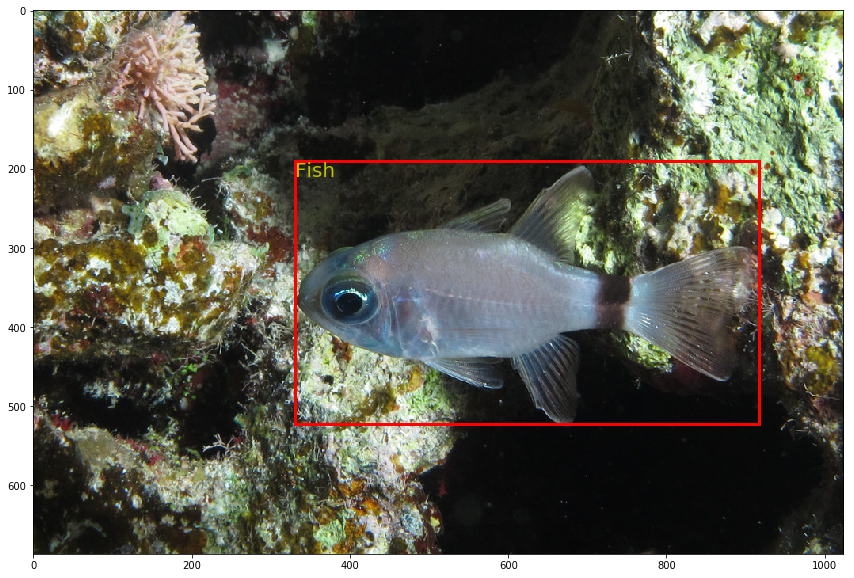

In [7]:
img_id = df['ImageID'][0]
img = mpimg.imread('/root/data/OID/images/train/'+img_id+'.jpg')
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)

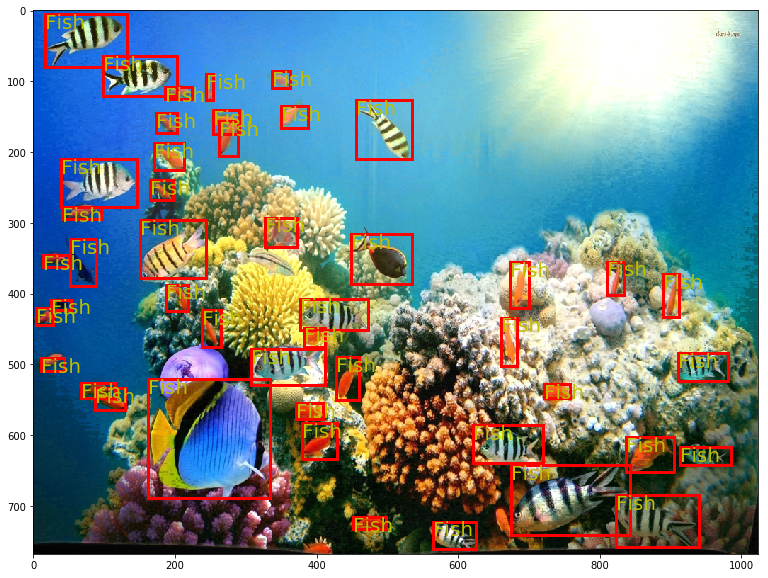

In [8]:
img_id = df['ImageID'][5875]
img = mpimg.imread('/root/data/OID/images/train/'+img_id+'.jpg')
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)

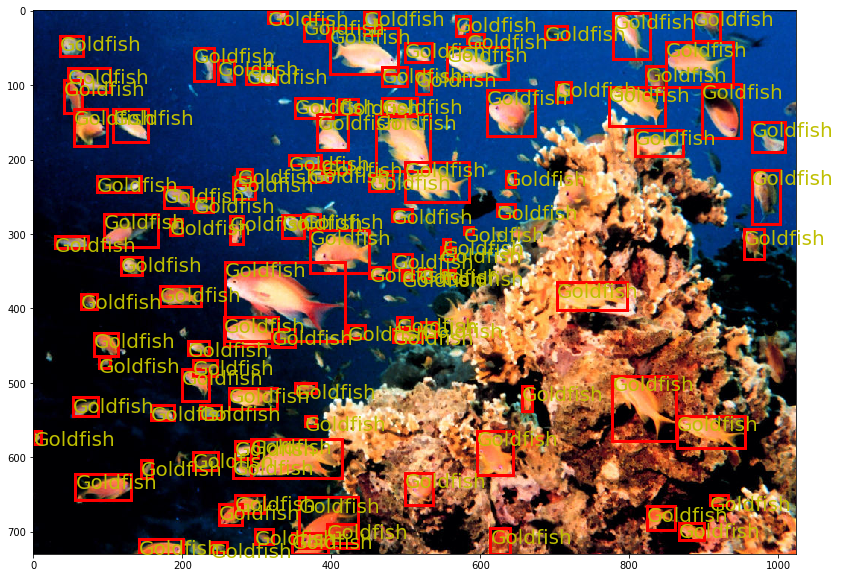

In [9]:
img_id = df['ImageID'][2930]
img = mpimg.imread('/root/data/OID/images/train/'+img_id+'.jpg')
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)